## 句法结构、语义解析、依存关系

> 句法分析(syntactic parsing)是自然语言处理中的关键技术之一，它是对输入的文本句子进行分析以得到句子的句法结构的处理过程。对句法结构进行分析，一方面是语言理解的自身需求，句法分析是语言理解的重要一环，另一方面也为其它自然语言处理任务提供支持。例如句法驱动的统计机器翻译需要对源语言或目标语言(或者同时两种语言)进行句法分析。

语义分析通常以句法分析的输出结果作为输入以便获得更多的指示信息。根据句法结构的表示形式不同，最常见的句法分析任务可以分为以下三种：
+ 句法结构分析(syntactic structure parsing)，又称短语结构分析(phrase structure parsing)，也叫成分句法分析(constituent syntactic parsing)。作用是识别出句子中的短语结构以及短语之间的层次句法关系。
+ 依存关系分析，又称依存句法分析(dependency syntactic parsing)，简称依存分析，作用是识别句子中词汇与词汇之间的相互依存关系。
+ 深层文法句法分析，即利用深层文法，例如词汇化树邻接文法(Lexicalized Tree Adjoining Grammar，LTAG)、词汇功能文法(Lexical Functional Grammar，LFG)、组合范畴文法(Combinatory Categorial Grammar，CCG)等，对句子进行深层的句法以及语义分析。


重要概念

依存句法认为“谓语”中的动词是一个句子的中心，其他成分与动词直接或间接地产生联系。
依存句法理论中，“依存”指词与词之间支配与被支配的关系，这种关系不是对等的，这种关系具有方向。确切的说，处于支配地位的成分称之为支配者(governor，regent，head)，而处于被支配地位的成分称之为从属者(modifier，subordinate，dependency)。
依存语法本身没有规定要对依存关系进行分类，但为了丰富依存结构传达的句法信息，在实际应用中，一般会给依存树的边加上不同的标记。
依存语法存在一个共同的基本假设：句法结构本质上包含词和词之间的依存(修饰)关系。一个依存关系连接两个词，分别是核心词(head)和依存词(dependent)。依存关系可以细分为不同的类型，表示两个词之间的具体句法关系。

### 依存分析器的性能评价

通常使用的指标包括：无标记依存正确率(unlabeled attachment score，UAS)、带标记依存正确率(labeled attachment score， LAS)、依存正确率(dependency accuracy，DA)、根正确率(root accuracy，RA)、完全匹配率(complete match，CM)等。这些指标的具体意思如下：

+ 无标记依存正确率(UAS)：测试集中找到其正确支配词的词(包括没有标注支配词的根结点)所占总词数的百分比。
+ 带标记依存正确率(LAS)：测试集中找到其正确支配词的词，并且依存关系类型也标注正确的词(包括没有标注支配词的根结点)占总词数的百分比。
+ 依存正确率(DA)：测试集中找到正确支配词非根结点词占所有非根结点词总数的百分比。
+ 根正确率(RA)：有二种定义，一种是测试集中正确根结点的个数与句子个数的百分比。另一种是指测试集中找到正确根结点的句子数所占句子总数的百分比。
+ 完全匹配率(CM)：测试集中无标记依存结构完全正确的句子占句子总数的百分比。

### StanfordCoreNLP

In [1]:
from stanfordcorenlp import StanfordCoreNLP
stanford_model_path = r'/home/chendian/download/stanford-corenlp-4.2.2/'
print(f"Now loading NER model from {stanford_model_path}")
stanford_model = StanfordCoreNLP(stanford_model_path, lang='zh', quiet=False)

Now loading NER model from /home/chendian/download/stanford-corenlp-4.2.2/
[main] INFO CoreNLP - --- StanfordCoreNLPServer#main() called ---
[main] INFO CoreNLP - Server default properties:
			(Note: unspecified annotator properties are English defaults)
			inputFormat = text
			outputFormat = json
			prettyPrint = false
[main] INFO CoreNLP - Threads: 48
[main] INFO CoreNLP - Starting server...
[main] INFO CoreNLP - StanfordCoreNLPServer listening at /0.0.0.0:9022


In [8]:
t = "公司作为债权人，与其他债权人依约向破产人申报债权"
results = stanford_model.parse(t)

[pool-1-thread-2] INFO CoreNLP - [/127.0.0.1:58330] API call w/annotators tokenize,ssplit,pos,parse
公司作为债权人，与其他债权人依约向破产人申报债权
[pool-1-thread-2] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[pool-1-thread-2] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/segmenter/chinese/ctb.gz ... done [15.7 sec].
[pool-1-thread-2] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[pool-1-thread-2] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[pool-1-thread-2] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/chinese-distsim.tagger ... done [0.8 sec].
[pool-1-thread-2] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator parse
[pool-1-thread-2] INFO edu.stanford.nlp.parser.common.ParserGrammar - Loading parser from serialized file edu/stanford/nlp/models/srparser/chineseSR.ser.gz ... done [4.9 sec].


In [9]:
print(results)

(ROOT
  (IP
    (NP (NN 公司))
    (VP
      (PP (VV 作为)
        (NP (NN 债权人)))
      (PU ，)
      (PP (P 与)
        (NP
          (DP (DT 其他))
          (NP (NN 债权人))))
      (ADVP (AD 依约))
      (PP (P 向)
        (NP (NN 破产人)))
      (VP (VV 申报)
        (NP (NN 债权))))))


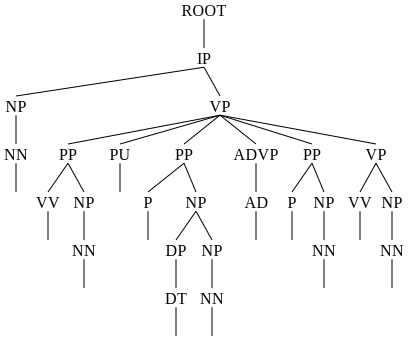

In [32]:
import matplotlib      
matplotlib.use('Agg')
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3), dpi=200)

from nltk import Tree 
from nltk.draw.tree import TreeView 
tr = Tree.fromstring(results)
# tr.pprint()
tr

In [11]:
stanford_model.close()

### HANLP

In [12]:
from pyhanlp import *
dep_zh = HanLP.parseDependency(t)
print(dep_zh)

1	公司	公司	n	n	_	2	主谓关系	_	_
2	作为	作为	v	v	_	0	核心关系	_	_
3	债权人	债权人	n	n	_	2	动宾关系	_	_
4	，	，	wp	w	_	2	标点符号	_	_
5	与	与	p	p	_	8	状中结构	_	_
6	其他	其他	r	r	_	7	定中关系	_	_
7	债权人	债权人	n	n	_	5	介宾关系	_	_
8	依约	依约	v	v	_	2	并列关系	_	_
9	向	向	p	p	_	12	状中结构	_	_
10	破产	破产	v	v	_	11	定中关系	_	_
11	人	人	n	n	_	9	介宾关系	_	_
12	申报	申报	v	v	_	8	并列关系	_	_
13	债权	债权	n	n	_	12	动宾关系	_	_



### DDParser

In [42]:
import pandas as pd
from pprint import pprint
pd.DataFrame(
    [line.split('\t') for line in """
    Label	关系类型	说明	示例
    SBV	主谓关系	主语与谓词间的关系	他送了一本书(他<--送)
    VOB	动宾关系	宾语与谓词间的关系	他送了一本书(送-->书)
    POB	介宾关系	介词与宾语间的关系	我把书卖了（把-->书）
    ADV	状中关系	状语与中心词间的关系	我昨天买书了（昨天<--买）
    CMP	动补关系	补语与中心词间的关系	我都吃完了（吃-->完）
    ATT	定中关系	定语与中心词间的关系	他送了一本书(一本<--书)
    F	方位关系	方位词与中心词的关系	在公园里玩耍(公园-->里)
    COO	并列关系	同类型词语间关系	叔叔阿姨(叔叔-->阿姨)
    DBL	兼语结构	主谓短语做宾语的结构	他请我吃饭(请-->我，请-->吃饭)
    DOB	双宾语结构	谓语后出现两个宾语	他送我一本书(送-->我，送-->书)
    VV	连谓结构	同主语的多个谓词间关系	他外出吃饭(外出-->吃饭)
    IC	子句结构	两个结构独立或关联的单句	你好，书店怎么走？(你好<--走)
    MT	虚词成分	虚词与中心词间的关系	他送了一本书(送-->了)
    HED	核心关系	指整个句子的核心	""".split('\n')])

,0,1,2,3
0,,None,None,None
1,Label,关系类型,说明,示例
2,SBV,主谓关系,主语与谓词间的关系,他送了一本书(他<--送)
3,VOB,动宾关系,宾语与谓词间的关系,他送了一本书(送-->书)
4,POB,介宾关系,介词与宾语间的关系,我把书卖了（把-->书）
5,ADV,状中关系,状语与中心词间的关系,我昨天买书了（昨天<--买）
6,CMP,动补关系,补语与中心词间的关系,我都吃完了（吃-->完）
7,ATT,定中关系,定语与中心词间的关系,他送了一本书(一本<--书)
8,F,方位关系,方位词与中心词的关系,在公园里玩耍(公园-->里)
9,COO,并列关系,同类型词语间关系,叔叔阿姨(叔叔-->阿姨)


In [38]:
from ddparser import DDParser
# requires: paddlepaddle, paddlehub
# requires: LAC  百度词法分析工具 LAC
t = """科研用检测试剂在药物成分含量分析、形状分析中不可或缺
全球半导体市场保持平稳增长，特别是中国区在国家半导体产业基金带动下，出现爆发式的增长。"""
dp = DDParser()
results = dp.parse(t.split('\n'))

In [39]:
results

[{'word': ['科研',
   '用',
   '检测',
   '试剂',
   '在',
   '药物',
   '成分',
   '含量',
   '分析',
   '、',
   '形状',
   '分析',
   '中',
   '不可或缺'],
  'head': [4, 4, 4, 14, 14, 7, 8, 9, 13, 9, 12, 9, 5, 0],
  'deprel': ['ATT',
   'ATT',
   'ATT',
   'SBV',
   'ADV',
   'ATT',
   'ATT',
   'ATT',
   'ATT',
   'MT',
   'ATT',
   'COO',
   'POB',
   'HED']},
 {'word': ['全球',
   '半导体',
   '市场',
   '保持',
   '平稳',
   '增长',
   '，',
   '特别',
   '是',
   '中国',
   '区',
   '在',
   '国家',
   '半导体',
   '产业',
   '基金',
   '带动',
   '下',
   '，',
   '出现',
   '爆发式',
   '的',
   '增长',
   '。'],
  'head': [3,
   3,
   4,
   0,
   6,
   4,
   4,
   9,
   20,
   11,
   20,
   20,
   15,
   15,
   16,
   17,
   18,
   12,
   12,
   4,
   23,
   21,
   20,
   20],
  'deprel': ['ATT',
   'ATT',
   'SBV',
   'HED',
   'ADV',
   'VOB',
   'MT',
   'ADV',
   'ADV',
   'ATT',
   'SBV',
   'ADV',
   'ATT',
   'ATT',
   'ATT',
   'ATT',
   'ATT',
   'POB',
   'MT',
   'IC',
   'ATT',
   'MT',
   'VOB',
   'MT']}]

In [1]:
import os
import jieba
from pyltp import Postagger, Parser

sent = '2018年7月26日，华为创始人任正非向5G极化码（Polar码）之父埃尔达尔教授举行颁奖仪式，表彰其对于通信领域做出的贡献。'

jieba.add_word('Polar码')
jieba.add_word('5G极化码')
jieba.add_word('埃尔达尔')
jieba.add_word('之父')
words = list(jieba.cut(sent))

print(words)

# 词性标注
pos_model_path = os.path.join('/home/chendian/download/ltp_data_v3.4.0/', 'pos.model')
postagger = Postagger()
postagger.load(pos_model_path)
postags = postagger.postag(words)

# 依存句法分析
par_model_path = os.path.join('/home/chendian/download/ltp_data_v3.4.0/', 'parser.model')
parser = Parser()
parser.load(par_model_path)
arcs = parser.parse(words, postags)

rely_id = [arc.head for arc in arcs]  # 提取依存父节点id
relation = [arc.relation for arc in arcs]  # 提取依存关系
heads = ['Root' if id == 0 else words[id-1] for id in rely_id]  # 匹配依存父节点词语

for i in range(len(words)):
    print(relation[i] + '(' + words[i] + ', ' + heads[i] + ')')


ModuleNotFoundError: No module named 'pyltp'

In [4]:
!ls -lht /home/chendian/download/ltp_data_v3.4.0/

total 1.3G
-rw-r--r-- 1 chendian chendian  260 Jul 27 17:13 md5.txt
-rw-r--r-- 1 chendian chendian    6 Jul 27 17:13 version
-rw-r--r-- 1 chendian chendian 175M Jul 27 17:12 cws.model
-rw-rw-r-- 1 chendian chendian 159M Jul 27 17:11 small.tgz
-rw-r--r-- 1 chendian chendian 351M Jul 27 17:09 parser.model
-rw-r--r-- 1 chendian chendian 414M Jul 27 17:04 pos.model
-rw-r--r-- 1 chendian chendian  22M Jul 27 16:59 ner.model
-rw-r--r-- 1 chendian chendian 188M Jul 27 16:58 pisrl.model
